<a href="https://colab.research.google.com/github/deksa89/deksa89/blob/main/Algorithmic_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program uses the Moving Average Convergence/Divergence (MACD) crossover 
#to determine when to buy and sell stocks

In [94]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [95]:
#Load the data
from google.colab import files
imported = files.upload()

Saving ETH-USD.csv to ETH-USD.csv


In [96]:
#Store the data into data frame(df)
df = pd.read_csv("ETH-USD.csv")

#Set the date to be the index
df = df.set_index(pd.DatetimeIndex(df["Date"].values))

#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-06-01,2020-06-01,230.860260,248.236282,230.488052,246.991760,246.991760,1.395173e+10
2020-06-02,2020-06-02,246.828186,252.222000,233.225296,237.219055,237.219055,1.378211e+10
2020-06-03,2020-06-03,237.395218,244.179321,235.464447,244.179321,244.179321,9.861761e+09
2020-06-04,2020-06-04,244.105286,245.928970,236.765305,244.426392,244.426392,1.017041e+10
2020-06-05,2020-06-05,244.349594,247.329498,240.682053,241.221985,241.221985,9.293964e+09
...,...,...,...,...,...,...,...
2021-08-24,2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,3172.456299,2.013103e+10
2021-08-25,2021-08-25,3174.269775,3248.727295,3086.114990,3224.915283,3224.915283,1.890273e+10
2021-08-26,2021-08-26,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,1.740567e+10
2021-08-27,2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,1.848960e+10


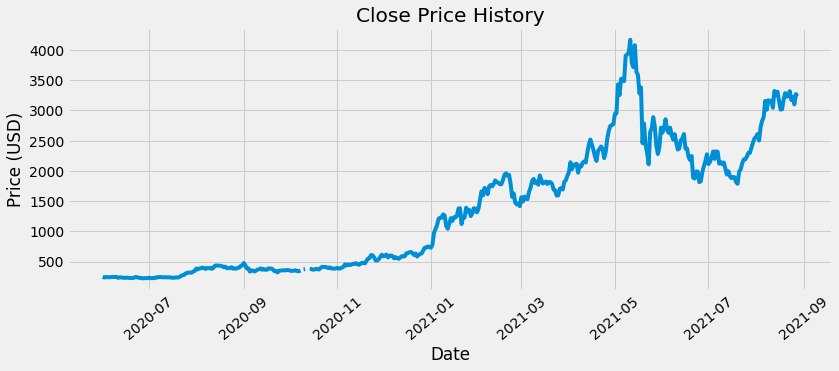

In [97]:
#Visually show the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(df["Close"], label = "Close")
plt.xticks(rotation = 40)
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [98]:
#Calculate the MACD and signal line indicators
#Calculate the short term exponential moving average(EMA)
shortEMA = df.Close.ewm(span=12, adjust=False).mean()

#Calculate the long term exponential moving average(EMA)
longEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculate the MACD line
MACD = shortEMA - longEMA

#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

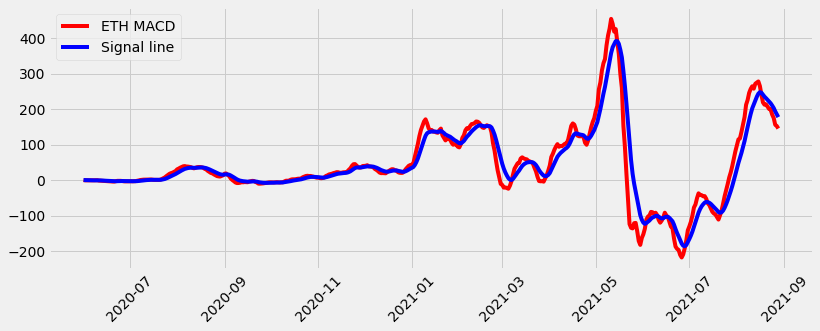

In [99]:
#Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label="ETH MACD", color = "red")
plt.plot(df.index, signal, label="Signal line", color = "blue")
plt.xticks(rotation = 45)
plt.legend(loc="upper left")
plt.show()

In [100]:
#Create new columns for the data
df['MACD'] = MACD
df['Signal'] = signal

#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal
2020-06-01,2020-06-01,230.860260,248.236282,230.488052,246.991760,246.991760,1.395173e+10,0.000000,0.000000
2020-06-02,2020-06-02,246.828186,252.222000,233.225296,237.219055,237.219055,1.378211e+10,-0.779589,-0.155918
2020-06-03,2020-06-03,237.395218,244.179321,235.464447,244.179321,244.179321,9.861761e+09,-0.826259,-0.289986
2020-06-04,2020-06-04,244.105286,245.928970,236.765305,244.426392,244.426392,1.017041e+10,-0.833698,-0.398729
2020-06-05,2020-06-05,244.349594,247.329498,240.682053,241.221985,241.221985,9.293964e+09,-1.085648,-0.536112
...,...,...,...,...,...,...,...,...,...
2021-08-24,2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,3172.456299,2.013103e+10,184.665323,210.203036
2021-08-25,2021-08-25,3174.269775,3248.727295,3086.114990,3224.915283,3224.915283,1.890273e+10,175.159895,203.194408
2021-08-26,2021-08-26,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,1.740567e+10,155.777707,193.711068
2021-08-27,2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,1.848960e+10,152.400210,185.448896


In [101]:
#Create a signal when to buy and sell an asset
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

  

      

In [102]:
#Create buy and sell column
a = buy_sell(df)
df["Buy_Signal_Price"] = a[0]
df["Sell_Signal_Price"] = a[1]

#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
2020-06-01,2020-06-01,230.860260,248.236282,230.488052,246.991760,246.991760,1.395173e+10,0.000000,0.000000,NaN,NaN
2020-06-02,2020-06-02,246.828186,252.222000,233.225296,237.219055,237.219055,1.378211e+10,-0.779589,-0.155918,NaN,237.219055
2020-06-03,2020-06-03,237.395218,244.179321,235.464447,244.179321,244.179321,9.861761e+09,-0.826259,-0.289986,NaN,NaN
2020-06-04,2020-06-04,244.105286,245.928970,236.765305,244.426392,244.426392,1.017041e+10,-0.833698,-0.398729,NaN,NaN
2020-06-05,2020-06-05,244.349594,247.329498,240.682053,241.221985,241.221985,9.293964e+09,-1.085648,-0.536112,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-24,2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,3172.456299,2.013103e+10,184.665323,210.203036,NaN,NaN
2021-08-25,2021-08-25,3174.269775,3248.727295,3086.114990,3224.915283,3224.915283,1.890273e+10,175.159895,203.194408,NaN,NaN
2021-08-26,2021-08-26,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,1.740567e+10,155.777707,193.711068,NaN,NaN
2021-08-27,2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,1.848960e+10,152.400210,185.448896,NaN,NaN


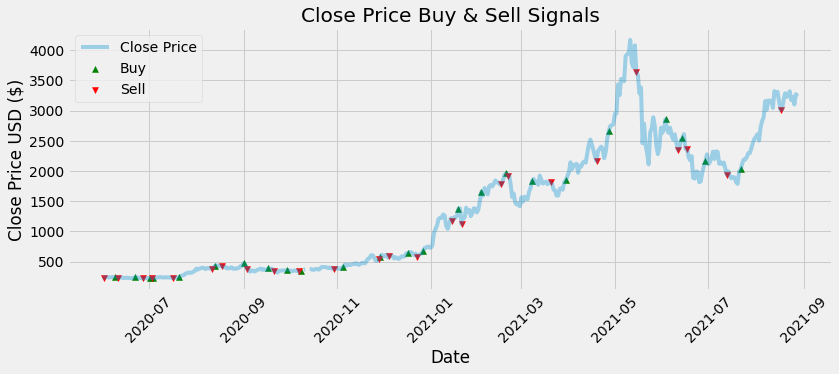

In [103]:
#Visually show buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy',marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell',marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha = 0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()
